## 4. Total Probability




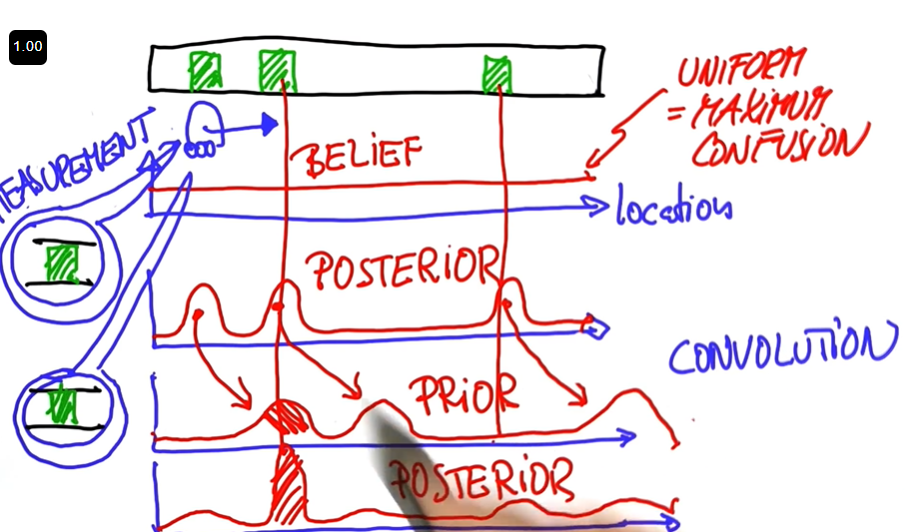

Posterior: probability after a measurement has been taken

Convolution: the process of moving believies to the right sdie 

## 8. Probability After Sense



In [34]:
import numpy as np
p = np.full(5, 0.2)
world = ['green', 'red', 'red', 'green', 'green']

pHit = 0 .6
pMiss = 0.2

def sense(p, Z):    
    nw = np.zeros(5)
    for i, w in enumerate(world):
        if(w==Z):
            nw[i] = 1
    q = p*nw*pHit + p*(1-nw)*pMiss
    q = q/q.sum()
    return q 

print(sense(p, 'red'))
print(sense(p, 'green'))



measurements = ['red', 'green']
for measurement in measurements:
    p = sense(p, measurement)    
print(p)

[0.11111111 0.33333333 0.33333333 0.11111111 0.11111111]
[0.27272727 0.09090909 0.09090909 0.27272727 0.27272727]
[0.2 0.2 0.2 0.2 0.2]


## Exact Motion

In [39]:
p = np.zeros(5)
p[2] = 1
def moveMetric(p, U):
    np.identity(3)
    

def move(p, U):
    U = U%len(p)
    return np.roll(p,U);
print(p)
print(move(p, 1))

[0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0.]


## Inaccurate Robot Motion

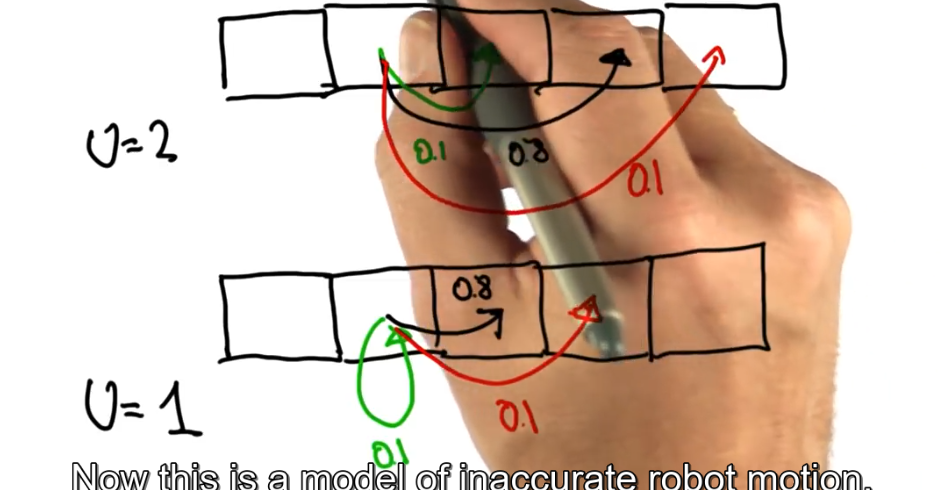


U=2
1. $$p(X_{i+2}|X_i) = 0.8$$
1. $$p(X_{i+1}|X_i) = 0.1$$
1. $$p(X_{i+3}|X_i) = 0.1$$

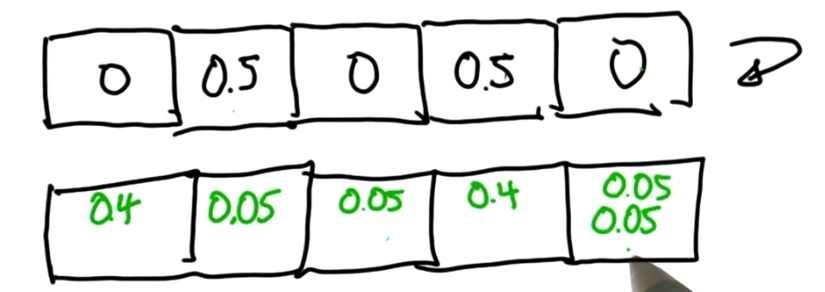

In [49]:
p = np.zeros(5)
p[1] = 1

pExact = 0.8
pOvershoot = 0.1
pUnderShoot = 0.1
def move(p, U):
    return np.roll(p,U)*pExact + np.roll(p,U+1)*pOvershoot + np.roll(p,U-1)*pUnderShoot;
print(p)
print(move(p, 1))

for i in range(1000):
    p = move(p,1)
print(p)

[0. 1. 0. 0. 0.]
[0.  0.1 0.8 0.1 0. ]
[0.2 0.2 0.2 0.2 0.2]


infinit motion steps => limit/stationary distribution
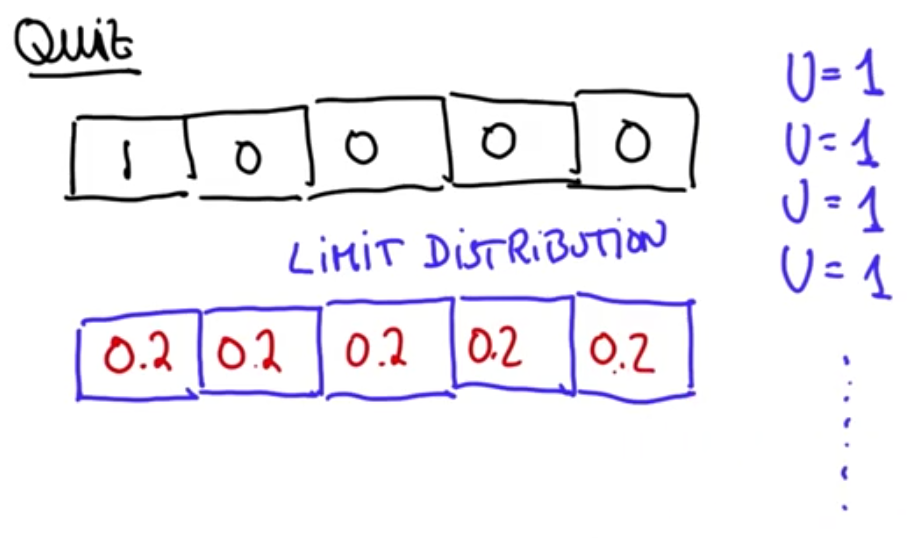

stationary=>has to be uniform

## Sence and Move 

1. Initial Belief => Sense
1. Sence/Move cycle
1. Every move loses information
1. Every sense gains information
1. Entropy: a measure of information $$-\sum{p(x_i)log p(x_i)}$$

In [51]:
motions = [1, 1]
p = np.full(5, 0.2)
world = ['green', 'red', 'red', 'green', 'green']

measurements = ['red', 'green']

for k in range(len(measurements)):
    p = sense(p, measurements[k])
    p = move(p, motions[k])
    
print(p)
# most likely at 4

[0.21157895 0.15157895 0.08105263 0.16842105 0.38736842]


In [53]:
motions = [1, 1]
p = np.full(5, 0.2)
world = ['green', 'red', 'red', 'green', 'green']

measurements = ['red', 'red']

for k in range(len(measurements)):
    p = sense(p, measurements[k])
    p = move(p, motions[k])
    
print(p)
# most likely at 3

[0.07882353 0.07529412 0.22470588 0.43294118 0.18823529]


### Summary
1. Belief: Probability
1. Sense: Product followed by normalization
1. Motion: Convolution (Addition)


## Formal Definition
1. Definition:
    1. $X = $ grid cell
    1. $Z = Measurement$
    1. $P(X) = Prior$
    1. $P(Z|X) =$ measurement probability
    1. $P(Z)$: same for all grid cells
        1. $\bar{P}(X_i|Z) = \sum{P(Z|X_i)(X_i)}$: non-normalized probability
        1. $\alpha = \sum{\bar{P}(X_i|Z)}$
        1.  ${P}(X_i|Z) =  \bar{P}(X_i|Z)/\alpha$: normalized probability
1. Probability: $0<=P(X)<=1$ 
1. Measurements: Bayes rule: $P(X|Z) = {P(Z|X)P(X)}/{P(Z)}$ 


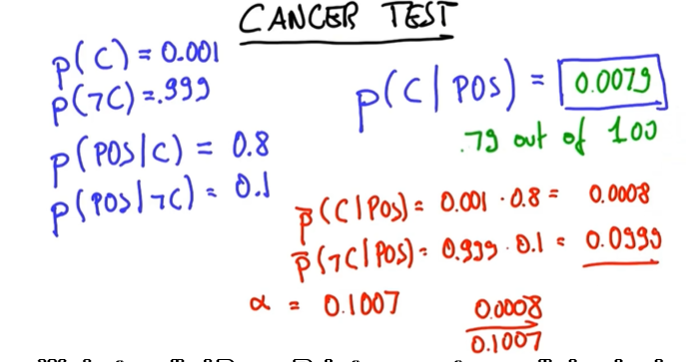

## Motion - Theorem of Total Probability
1. $P(X_i^t) = \sum{P(X_j^{t-1})P(X_i|X_j)}$ (Convolution)

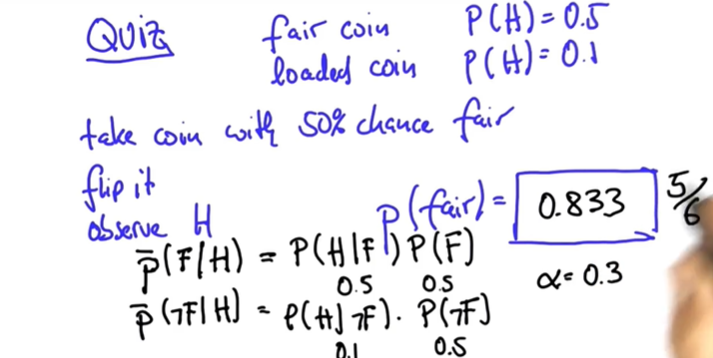